# IMPORT DEPENDENCIES

In [14]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [4]:
X, y, = datasets.load_iris(return_X_y=True)

Supervised learnin is that in which we have labels available for the dataset.

In supervised learning exists the possibility of evaluating the model in order to know how well it performs predictions.

If we want to be able to do this we need to split the dataset in two subgroups, one for training the model and one to test the results.

Why do we do this? If we don't train and test our model we risk overfitting the model to our current dataset thus, failing to predict data from outside our sample.

In [8]:
from sklearn.model_selection import train_test_split #this is the function

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y)

# ALWAYS USE STRATIFY
# this parameter distributes evenly the labels between train and test datasets
# f.e.: in fraud detection 1 of each 100k transactions is fraudulent, this is so low that we might distribute them unevenly if we dont specify this.

In [19]:
X, y = datasets.load_boston(return_X_y=True)
datasets.load_boston()['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [20]:
from sklearn import feature_selection
from sklearn.linear_model import LinearRegression


scores_sfs = []

for i in range(1, X_train.shape[1]):
    lr = LinearRegression()
    sfs = feature_selection.SequentialFeatureSelector(
                        estimator=lr, n_features_to_select=i, direction='forward', scoring='r2')
    sfs.fit(X_train,  y_train)
    lr.fit(X_train[:, sfs.support_], y_train)
    scores_sfs.append(lr.score(X_test[:, sfs.support_], y_test))

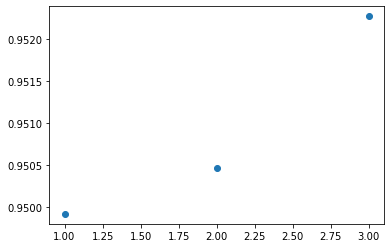

In [21]:
fig, ax = plt.subplots()
ax.scatter(range(1, X_train.shape[1]), scores_sfs)